In [163]:
using MAT
using Plots
using MultivariateStats  # for PCA
#plotlyjs();
pyplot()

Plots.PyPlotBackend()

In [4]:
mouse_name = "ts8_SC"
date = "180415"
session_name = "sine_grating"
roi = (-1, 16)
stepsize = 0.1

# nbins = (roi[2] - roi[1]) / stepsize
nbins = 2000

experiment_id = "$(mouse_name)_$(date)_$(session_name)"

_raw_data = joinpath("data/3GratingSequence/SpikeTrain/", experiment_id)
_chart_dir = joinpath("data/3GratingSequence/CHART/", experiment_id)

_temp = "data/3GratingSequence/temp"

ABABA_responses = matread(joinpath(_chart_dir, "linear_filter_ABABA.mat"))
ABABB_responses = matread(joinpath(_chart_dir, "linear_filter_ABABB.mat"))

Dict{String,Any} with 13 entries:
  "WBC15a" => [2.4845e-6 2.79247e-6 … 6.31008 6.41313; 18.3762 18.6275 … 2.1356…
  "WBC02b" => [3.54361 3.53705 … 2.36479 2.39206; 6.08772 6.04834 … 5.44558 5.4…
  "WBC11a" => [4.30904 4.28028 … 28.5055 28.6453; 8.01436 8.02128 … 4.07118 4.1…
  "WBC12a" => [2.46961e-7 2.78322e-7 … 1.92281 1.95212; 5.24385 5.29763 … 1.091…
  "WBC08a" => [9.80264e-302 4.44091e-302 … 7.91044e-7 8.85204e-7; 1.49803e-41 2…
  "WBC06a" => [0.990555 0.986575 … 1.74469 1.74238; 1.77678 1.79023 … 0.907316 …
  "WBC04a" => [3.46637e-7 3.74091e-7 … 1.88657 1.90982; 4.21037e-6 3.78692e-6 ……
  "WBC10a" => [0.819138 0.810873 … 1.88136 1.89509; 0.410819 0.424396 … 0.00648…
  "WBC09a" => [5.68232e-207 1.09392e-206 … 0.225707 0.234415; 1.82575 1.84154 ……
  "WBC02a" => [2.14268 2.12782 … 6.75767 6.76125; 3.89677 3.95103 … 12.4065 12.…
  "WBC16a" => [0.000146931 0.000160572 … 12.1482 12.3001; 24.5514 24.8444 … 2.9…
  "WBC03a" => [11.9949 12.0609 … 18.4993 18.4629; 13.4987 13.6085 … 4.30156

In [120]:
population_ABABA = zeros(nbins)
for (channel, response) in ABABA_responses
    population_ABABA = hcat(population_ABABA, mean(response, 1)')
end
population_ABABA = population_ABABA[:,2:end];

population_ABABB = zeros(nbins)
for (channel, response) in ABABB_responses
    population_ABABB = hcat(population_ABABB, mean(response, 1)')
end
population_ABABB = population_ABABB[:,2:end];

In [160]:
plot()
for (channel, response) in ABABA_responses
    plot!(mean(response, 1)', label=channel)
end
plot!()

In [159]:
plot()
for (channel, response) in ABABB_responses
    plot!(mean(response, 1)', label=channel)
end
plot!()

# Indirect Trajectory of Firing Rate

In [176]:
ABABA_marker = [
    (-1,0,"#78C2C4"),
    (0,1,:blue),
    (1,2,"#78C2C4"),
    (2,3,:blue),
    (3,4,"#78C2C4"),
    (4,5,:blue),
    (5,6,"#78C2C4"),
    (6,7,:blue),
    (7,8,"#78C2C4"),
    (8,9,:violet),
    (9,16,"#78C2C4")]

ABABB_marker = [
    (-1,0,"#F7C242"),
    (0,1,:blue),
    (1,2,"#F7C242"),
    (2,3,:blue),
    (3,4,"#F7C242"),
    (4,5,:blue),
    (5,6,"#F7C242"),
    (6,7,:blue),
    (7,8,"#F7C242"),
    (8,9,:red),
    (9,16,"#F7C242")]

traj2d_ABABAA = fit(PCA, population_ABABA, maxoutdim=2).proj
traj2d_ABABAB = fit(PCA, population_ABABB, maxoutdim=2).proj;

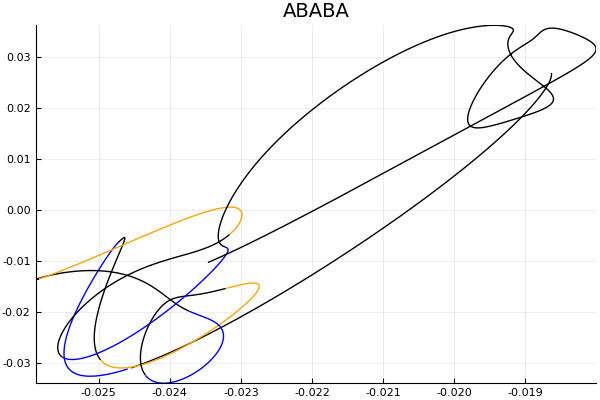

In [134]:
plot(legend=false)
for (m_start, m_end, m_color) in ABABA_marker
    h_start = ceil((m_start-roi[1])/(roi[2]-roi[1])*nbins+1) |> Int
    h_end = ceil((m_end-roi[1])/(roi[2]-roi[1])*nbins) |> Int
    
    plot!(traj2d_ABABAA[h_start:h_end,1], traj2d[h_start:h_end,2], color=m_color, title="ABABA")
end
plot!()

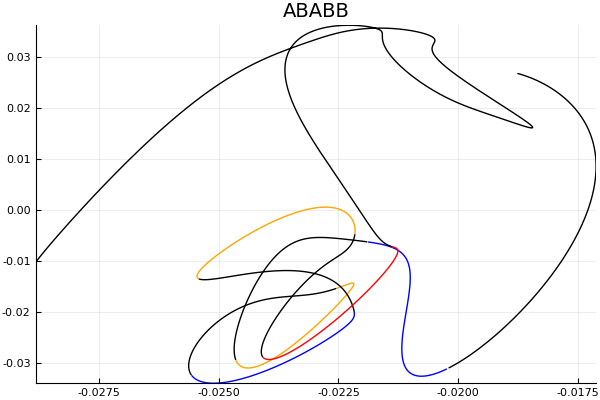

In [144]:
plot(legend=false)
for (m_start, m_end, m_color) in ABABB_marker
    h_start = ceil((m_start-roi[1])/(roi[2]-roi[1])*nbins+1) |> Int
    h_end = ceil((m_end-roi[1])/(roi[2]-roi[1])*nbins) |> Int
    
    plot!(traj2d_ABABAB[h_start:h_end,1], traj2d[h_start:h_end,2], color=m_color, title="ABABB")
end
plot!()

In [197]:
plot(title=experiment_id, legend=false)

current_idx = 2000
for  idx = 1:length(ABABB_marker)
    m_start, m_end, m_color = ABABB_marker[idx]
    h_start = ceil((m_start-roi[1])/(roi[2]-roi[1])*nbins+1) |> Int
    h_end = ceil((m_end-roi[1])/(roi[2]-roi[1])*nbins) |> Int
    if h_start > current_idx
        break
    elseif h_end >= current_idx
        h_end = current_idx
    end
    
    plot!(traj2d_ABABAA[h_start:h_end,1], traj2d[h_start:h_end,2], color=ABABA_marker[idx][3], label="ABABA")
    plot!(traj2d_ABABAB[h_start:h_end,1], traj2d[h_start:h_end,2], color=ABABB_marker[idx][3], label="ABABB")
end
plot!()
savefig(joinpath(_chart_dir, "trajectory_$(experiment_id).png"))

In [166]:
2000/17*9

1058.8235294117646

In [195]:
anim = @animate for current_idx = 1:10:nbins
    plot(title=experiment_id)
    for  idx = 1:length(ABABB_marker)
        m_start, m_end, m_color = ABABB_marker[idx]
        h_start = ceil((m_start-roi[1])/(roi[2]-roi[1])*nbins+1) |> Int
        h_end = ceil((m_end-roi[1])/(roi[2]-roi[1])*nbins) |> Int
        if h_start > current_idx
            break
        elseif h_end >= current_idx
            h_end = current_idx
        end

        plot!(traj2d_ABABAA[h_start:h_end,1], traj2d[h_start:h_end,2], color=ABABA_marker[idx][3],
              xlims=(-0.027,-0.016),ylims=(-0.035,0.035), legend=false)
        plot!(traj2d_ABABAB[h_start:h_end,1], traj2d[h_start:h_end,2], color=ABABB_marker[idx][3])
    end
    plot!()
    end
gif(anim, joinpath(_temp,"demo.gif"), fps = 24)

INFO: Saved animation to /Users/zane/Documents/MyDocuments/Plans/2-private/eagle/Foundation/Project Sesame/Sesame/Analysis/data/3GratingSequence/temp/demo.gif


Plots.AnimatedGif("/Users/zane/Documents/MyDocuments/Plans/2-private/eagle/Foundation/Project Sesame/Sesame/Analysis/data/3GratingSequence/temp/demo.gif")

# Direct

In [161]:
plot()
x_B = mean(ABABB_responses["WBC02a"],1)'
y_B = mean(ABABB_responses["WBC02b"],1)'
x_A = mean(ABABA_responses["WBC02a"],1)'
y_A = mean(ABABA_responses["WBC02b"],1)'
plot()
plot!(x_B, y_B)
plot!(x_A, y_A)
plot!()